In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.info() #null값 확인(채울거 채우고 뺄거 빼고)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True) #바뀐내용이 리턴
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_df.Cabin.value_counts() #중간에 띄어쓰기가 있으니 첫글자만 빼서 슬라이스 해줄거야 #선실확인 후 어떻게 분류할까 생각

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [8]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [9]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [10]:
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [11]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

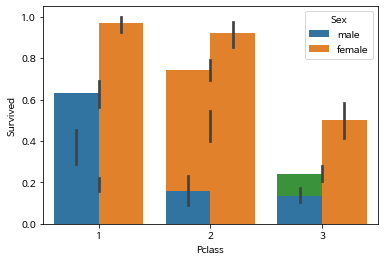

In [12]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)
sns.barplot(x='Pclass',y='Survived',data=titanic_df)
sns.barplot(x='Pclass',y='Survived', hue='Sex',data=titanic_df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

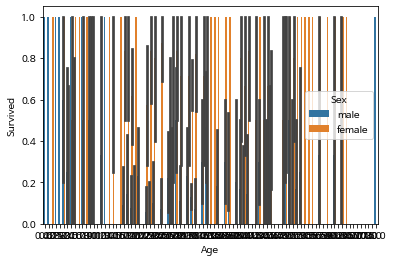

In [13]:
sns.barplot(x='Age',y='Survived', hue='Sex',data=titanic_df)

In [14]:
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
    return cat

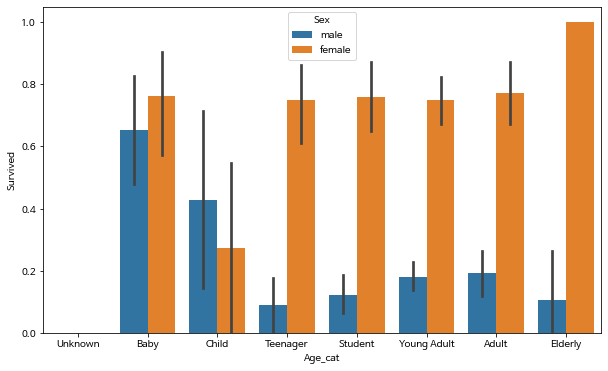

In [15]:
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly'] #내가 원하는 순서대로 만들어준다
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x)) #새로운 컬럼에 넣을거야
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names) #order 내가 정한 순서대로
titanic_df.drop(columns='Age_cat',inplace=True) 

In [16]:
def encode_features(dataDf):
    from sklearn.preprocessing import LabelEncoder #따로 호출안하고 함수안에서 호출 가능
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        dataDf[feature] = LabelEncoder().fit_transform(dataDf[feature])
    return dataDf

In [17]:
titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [18]:
#전처리 끝나고 함수처리
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_feature(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder 
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [19]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
#전처리 끝

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#우리가 평가한 수치값이 다른 사람들이 넣은 수치값에도 정확도가 비슷해야 함, 학습과 검증용 데이터는 분리시킨다.
#평가의 목적: 실제 서비스를 했을 때 평가에서 나왔던 만큼의 결과가 나와야함
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                y_titanic_df,
                                                test_size=0.2,
                                                random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
dt_clf = DecisionTreeClassifier(random_state=11) #성능낮
rf_clf = RandomForestClassifier(random_state=11) #결정나무를 모아서 작동, 성능 괜찮
lr_clf = LogisticRegression() 

In [26]:
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

In [28]:
print('dt',accuracy_score(y_test,dt_pred))
print('rf',accuracy_score(y_test,rf_pred))
print('lr',accuracy_score(y_test,lr_pred))

dt 0.7877094972067039
rf 0.8547486033519553
lr 0.8491620111731844


# day3 p142

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.model_selection import KFold

In [39]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(f'교차검증{iter_count} 정확도:{accuracy:.4f}') #소수이하 네자리
    mean_score = np.mean(scores)
    print(f'평균 정확도:{mean_score:.4f}')

In [54]:
exec_kfold(dt_clf) #dt 0.7877094972067039
# 교차검증0 정확도:0.7542
# 교차검증1 정확도:0.7809
# 교차검증2 정확도:0.7865
# 교차검증3 정확도:0.7697
# 교차검증4 정확도:0.8202
# 평균 정확도:0.7823

교차검증0 정확도:0.7542
교차검증1 정확도:0.7809
교차검증2 정확도:0.7865
교차검증3 정확도:0.7697
교차검증4 정확도:0.8202
평균 정확도:0.7823


In [41]:
exec_kfold(rf_clf) #rf 0.8547486033519553
# 교차검증0 정확도:0.7933
# 교차검증1 정확도:0.8090
# 교차검증2 정확도:0.8371
# 교차검증3 정확도:0.7753
# 교차검증4 정확도:0.8596
# 평균 정확도:0.8148

교차검증0 정확도:0.7933
교차검증1 정확도:0.8090
교차검증2 정확도:0.8371
교차검증3 정확도:0.7753
교차검증4 정확도:0.8596
평균 정확도:0.8148


In [42]:
exec_kfold(lr_clf) #lr 0.8491620111731844
# 교차검증0 정확도:0.8045
# 교차검증1 정확도:0.7809
# 교차검증2 정확도:0.7753
# 교차검증3 정확도:0.7584
# 교차검증4 정확도:0.8371
# 평균 정확도:0.7912

교차검증0 정확도:0.8045
교차검증1 정확도:0.7809
교차검증2 정확도:0.7753
교차검증3 정확도:0.7584
교차검증4 정확도:0.8371
평균 정확도:0.7912


In [43]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'퍙균정확도:{np.mean(scores):.4f}')

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
퍙균정확도:0.7879


In [45]:
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'퍙균정확도:{np.mean(scores):.4f}')

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
퍙균정확도:0.7879


In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

In [62]:
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [63]:
grid_dclf.cv_results_

{'mean_fit_time': array([0.00159602, 0.00180573, 0.00158815, 0.00139074, 0.00159621,
        0.0013979 , 0.00159698, 0.00139699, 0.0015985 , 0.00170588,
        0.00161481, 0.00160275, 0.0017807 , 0.00160222, 0.00158601,
        0.00161281, 0.00221257, 0.00161161, 0.00180988, 0.00119619,
        0.00199418, 0.00200548, 0.00139441, 0.00200791, 0.00178661,
        0.00140042, 0.00202794, 0.00200129, 0.00220046, 0.00201316,
        0.00137753, 0.00140953, 0.00178452, 0.00200849, 0.00199332,
        0.00139556]),
 'std_fit_time': array([4.88169185e-04, 4.02677176e-04, 4.94187838e-04, 4.93165529e-04,
        4.89202646e-04, 4.86924930e-04, 7.97124021e-04, 4.95485862e-04,
        4.91882747e-04, 3.92417253e-04, 4.76957902e-04, 4.69636881e-04,
        7.61822440e-04, 4.77285446e-04, 5.08638900e-04, 5.06191799e-04,
        3.90630850e-04, 5.01749701e-04, 4.07260233e-04, 4.31236758e-04,
        1.72779627e-05, 2.65267215e-05, 5.01582661e-04, 3.28122871e-05,
        3.95089746e-04, 4.87060422e-0

In [64]:
grid_dclf.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [65]:
grid_dclf.best_score_

0.7991825076332119

In [66]:
grid_dclf.best_estimator_ #제일 좋았던 모델

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=11)

In [68]:
best_dclf = grid_dclf.best_estimator_
dpred = best_dclf.predict(X_test)
accuracy_score(y_test,dpred)

0.8715083798882681

## 평가 p147

In [72]:
from sklearn.base import BaseEstimator

In [73]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass #아무것도 정의안함
    
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # 1=남자
                pred[i]=0
            else:
                pred[i]=1
        return pred
    
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_feature(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder 
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split #분리
from sklearn.metrics import accuracy_score #평가 

In [75]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                y_titanic_df,
                                                test_size=0.2,
                                                random_state=0)
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test,pred)

0.7877094972067039

In [76]:
from sklearn.datasets import load_digits

In [77]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [80]:
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)
y_test.shape,pd.Series(y_test).value_counts()

((450,),
 0    402
 1     48
 dtype: int64)

In [81]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
pred = fakeclf.predict(X_test)
accuracy_score(y_test,pred)

0.8933333333333333

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test,pred) #TN,FP,FN,TP

array([[402,   0],
       [ 48,   0]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [85]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f}')

In [86]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                y_titanic_df,
                                                test_size=0.2,
                                                random_state=0)

In [88]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [89]:
lr_clf = LogisticRegression() #리니어 회귀 모델
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681


In [91]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
pred_proba[:7],pred[:7] 

#각 행 별로 0일 확률이 큰가, 1일 확률이 큰가

(array([[0.85143272, 0.14856728],
        [0.89230123, 0.10769877],
        [0.93333601, 0.06666399],
        [0.05347494, 0.94652506],
        [0.3139637 , 0.6860363 ],
        [0.4899739 , 0.5100261 ],
        [0.08208226, 0.91791774]]),
 array([0, 0, 0, 1, 1, 1, 1], dtype=int64))

In [92]:
from sklearn.preprocessing import Binarizer

In [93]:
X= [[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

In [97]:
binarizer = Binarizer(threshold=1.1) #0.0일때, 1.1일때
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [98]:
custom_threshold=0.5 #기본경계선
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681


In [99]:
custom_threshold=0.4 #앞쪽으로이동, 재현율 올라감
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[86 24]
 [13 56]]
정확도:0.7933,정밀도:0.7000,재현율:0.8116


In [100]:
custom_threshold=0.6 #뒤쪽으로이동, 정밀도 올라감
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[99 11]
 [25 44]]
정확도:0.7989,정밀도:0.8000,재현율:0.6377


In [101]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [102]:
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[86 24]
 [13 56]]
정확도:0.7933,정밀도:0.7000,재현율:0.8116
임계값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도:0.8156,정밀도:0.7432,재현율:0.7971
임계값: 0.5
오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681
임계값: 0.55
오차행렬
[[97 13]
 [18 51]]
정확도:0.8268,정밀도:0.7969,재현율:0.7391
임계값: 0.6
오차행렬
[[99 11]
 [25 44]]
정확도:0.7989,정밀도:0.8000,재현율:0.6377


In [103]:
#정밀도는 놀라가는데 재현율은 떨어짐.
#어느게 적절한지 체크

### 5교시

In [104]:
from sklearn.metrics import precision_recall_curve

In [143]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [144]:
precision,recall,thresholds = precision_recall_curve(y_test,pred_proba_class1) #array가 총 3개가 들어가 있음 1.정밀값 2.재현율 3.쓰레스홀드

In [108]:
precision.shape,recall.shape,thresholds.shape

((167,), (167,), (166,))

In [109]:
thr_index = np.arange(0,thresholds.shape[0],15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165])

In [110]:
print(np.round(precision[thr_index],3))
print(np.round(recall[thr_index],3))

[0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
[1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


In [111]:
import matplotlib.pyplot as plt
import matplotlib.ticker as kicker

In [145]:
def precision_recall_curve_plot(y_test,pred_proba):
    precision,recall,thresholds = precision_recall_curve(y_test,pred_proba_class1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precision[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recall[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()
    plt.show()

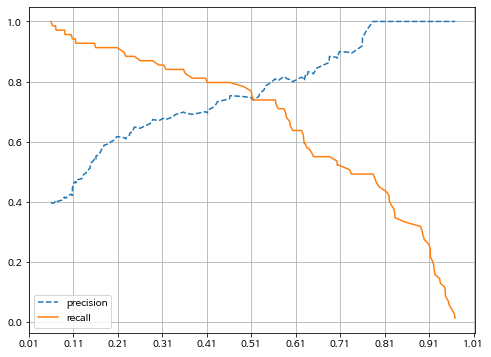

In [146]:
precision_recall_curve_plot(y_test,pred_proba_class1)

### F1스코어: 정밀도와 재현율을 결합

In [120]:
from sklearn.metrics import f1_score

In [122]:
f1 = f1_score(y_test,pred)
f1

0.7571428571428571

In [123]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},F1:{f1:.4f}')

In [124]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

#임계값0.45지점이 제일 높게 나옴

임계값: 0.4
오차행렬
[[86 24]
 [13 56]]
정확도:0.7933,정밀도:0.7000,재현율:0.8116,F1:0.7517
임계값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도:0.8156,정밀도:0.7432,재현율:0.7971,F1:0.7692
임계값: 0.5
오차행렬
[[92 18]
 [16 53]]
정확도:0.8101,정밀도:0.7465,재현율:0.7681,F1:0.7571
임계값: 0.55
오차행렬
[[97 13]
 [18 51]]
정확도:0.8268,정밀도:0.7969,재현율:0.7391,F1:0.7669
임계값: 0.6
오차행렬
[[99 11]
 [25 44]]
정확도:0.7989,정밀도:0.8000,재현율:0.6377,F1:0.7097


In [ ]:
#오차행렬을 이용해 정밀도, 재현율이 구해지고 

### p169

In [125]:
from sklearn.metrics import roc_curve

In [147]:
fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1) #fpr,tpr,thresholds

In [128]:
thr_index = np.arange(1,thresholds.shape[0],5)
thr_index

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])

In [129]:
fprs[thr_index]

array([0.        , 0.04545455, 0.09090909, 0.10909091, 0.22727273,
       0.26363636, 0.46363636, 0.51818182, 0.72727273, 0.85454545,
       1.        ])

In [130]:
tprs[thr_index]

array([0.01449275, 0.55072464, 0.5942029 , 0.73913043, 0.8115942 ,
       0.86956522, 0.91304348, 0.92753623, 0.94202899, 0.97101449,
       1.        ])

In [133]:
def roc_curve_plot(y_test,pred_proba):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba)
    plt.plot(fprs,tprs,label='Roc')
    plt.show()

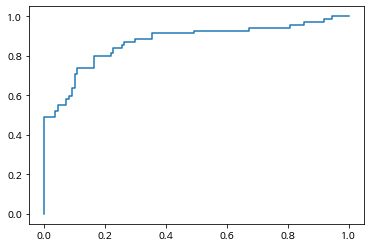

In [148]:
roc_curve_plot(y_test,pred_proba_class1)